# Constant and Sine Wave Interfaces
# Sections For Export

Chris Field, January 2022

*Create simple sections and export as png files (velocity models).*
Approach:
* Create a list or linear array, the length of the desired section with the values the integer depths of the horizon
* Create a blank NumPy array the desired length and depth of the section
* Use the list to insert velocity values at the specified depth
* Vertical running sum
* Add a constant value to all cells
* Plot in matplotlib

In [1]:
import numpy as np
import math
import random

from skimage.io import imread, imsave
from datetime import datetime
#
# Plotting requirements
import matplotlib.pyplot as plt

Notes:
The SciPy stats probability density function for Pareto is defined for x >= 1. We need to move it back by 1 so it's >=0

## Define functions

In [2]:
def flat_interface(L=5000, D_int=3000):
    """
    Create a flat interface depth: array of contant values
    
    Returns:
    samples -- an array indexed by the spatial step that tells us if we have positive, negative or no throw 
            on this spatial grid cell. It is created from rounding the values of throw to the nearest integer
            and then creating that many grid cells with the sense of throw (negative or positive)
    
    Variables:
    L -- cross-section length, number of random numbers, int
    D_int -- starting depth (adds to the first throw value), int

    """

    # Samples is the spatial grid, indexed by i later.
    samples = [D_int] * L

    return samples

In [3]:
def sine_interface(L=5000, D_int=3000, wav_len=100, amp=100):
    """
    Create a sine wave, note the amplitudes are rounded to the nearest interger
    
    Variables:
    L -- cross-section length, number of random numbers, int
    D_int -- starting depth (adds to the first throw value), int
    wav_len -- wave length of sine wave, int
    amp -- amplitude of sine wave
    
    Returns:
    samples -- an array indexed by the spatial step that tells us if we have positive, negative or no throw 
            on this spatial grid cell. It is created from rounding the values of throw to the nearest integer
            and then creating that many grid cells with the sense of throw (negative or positive)
    

    """

    # Samples is the spatial grid, indexed by i later.
    const = [D_int] * L

    x = np.arange(L)
    y = np.rint( (amp * np.sin(2 * np.pi * x / wav_len) ))
    y = y.astype(np.int)
         
    samples = const + y
                
    return samples

In [4]:
def numpy_grid(L=5000, D=5000):
    """
    Create a blank (zero value) of dimensions L x D
    
    Variables:
    L -- cross-section length, int
    D -- maximum depth of array, int
    
    Returns:
    grid -- ndarray of zero values of speicifed dimensions  

    """
    size=(L,D)
    grid = np.zeros(size, dtype='uint16', order='C')

    return grid

In [5]:
def interface_grid(grid, samples, vel=4000):
    """
    Insert an interface into the grid with the velocity values at the samples depths
    
    Variables:
    grid -- ndarray, int
    samples -- depths to insert velocity values, array or list
    vel -- velocity value to insert, float or int
    
    Returns:
    int_grid -- ndarray with velocity values at speicifed depths  

    """    
    x = np.arange(len(samples))
    y = samples
    
    for _x, _y in zip(x,y):
        grid[_y][_x] = vel
        pass

    return grid    

In [6]:
def sum_and_shift(int_grid, shift = 2000, conv=True):
    """
    Vertical running sum of the grid and then add constant value
    
    Variables:
    int_grid -- input ndarray, int
    shift -- value to be added to all grid points
    conv -- convert to uint16, boolean

    
    Returns:
    sum_grid -- summed and shifted grid  

    """    
    sum_grid = np.cumsum(int_grid,axis=0)
    sum_grid += shift
    
    if conv:
        sum_grid = sum_grid.astype(np.uint16)
        
    return sum_grid    

# Constant Interface

In [7]:
samples = flat_interface()
grid = numpy_grid()

In [8]:
%timeit interface_grid(grid, samples)

1.51 ms ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
int_grid = interface_grid(grid, samples, vel=4000)
final_grid = sum_and_shift(int_grid, shift = 2000, conv=True)

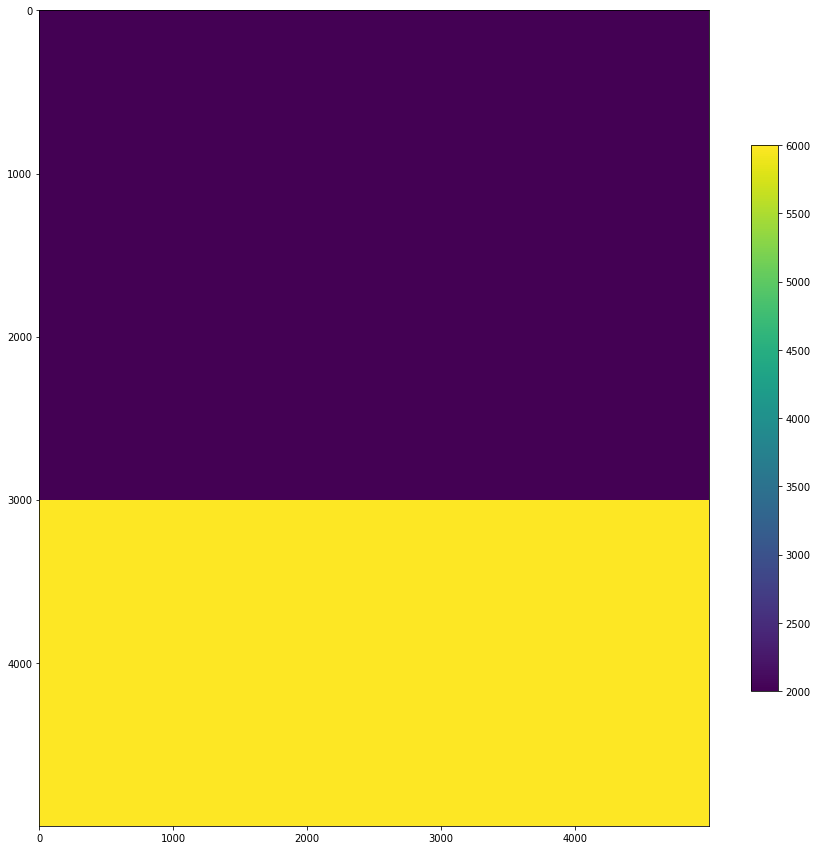

In [10]:
plt.figure(figsize=(15,15))
c1 = plt.imshow(final_grid, interpolation='none', origin="upper", aspect='auto' )

plt.colorbar(c1, shrink=0.67)
plt.show()

In [11]:
# Export and reload confirming the data is the same:
date = str(datetime.today().strftime('%Y-%m-%d'))
imsave(date+'_constant.png', final_grid, check_contrast=False)
y = imread(date+'_constant.png')
(final_grid == y).all()  # True

True

# Sine Wave

In [12]:
samples = sine_interface(L=5000, D_int=3000, wav_len=100, amp=100)
grid = numpy_grid()

In [15]:
int_grid = interface_grid(grid, samples, vel=4000)

In [16]:
final_grid = sum_and_shift(int_grid, shift = 2000, conv=True)

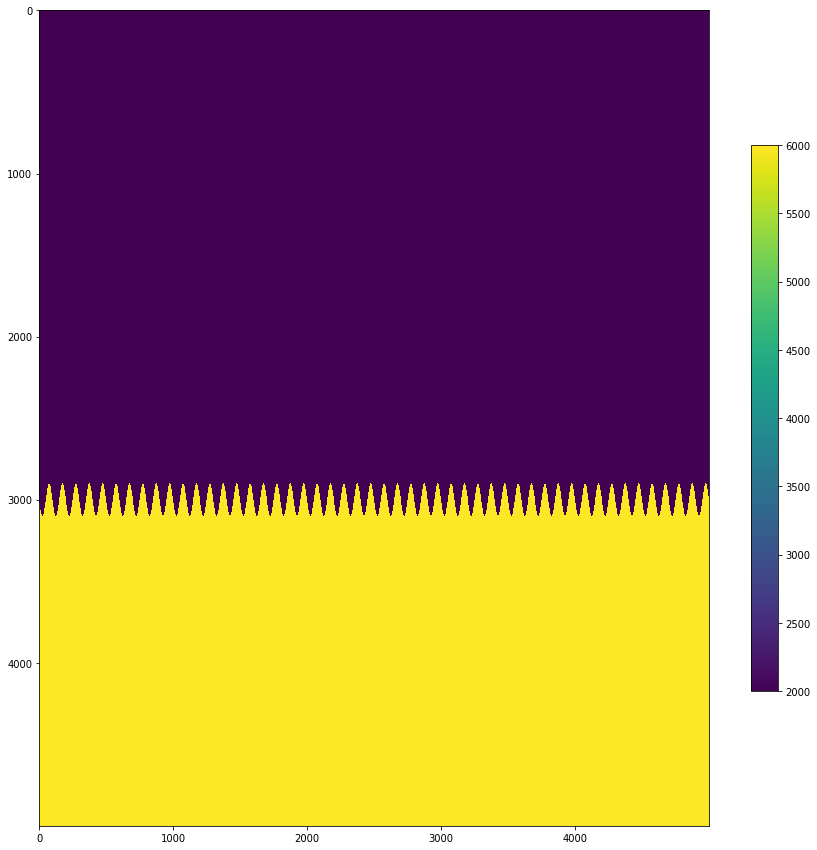

In [17]:
plt.figure(figsize=(15,15))
c1 = plt.imshow(final_grid, interpolation='none', origin="upper", aspect='auto' )

plt.colorbar(c1, shrink=0.67)
plt.show()

In [18]:
# Export and reload confirming the data is the same:
date = str(datetime.today().strftime('%Y-%m-%d'))
imsave(date+'_sine.png', final_grid, check_contrast=False)
y = imread(date+'_constant.png')
(final_grid == y).all()  # True

False